In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/data/Fluo4/8-11-16/Ar fluo4-4

/Users/austinmcdonald/Desktop/data/Fluo4/8-11-16/Ar fluo4-4


In [3]:
os.listdir()

['.DS_Store',
 'Ca_0-4s.csv',
 'Ca_1-4s.csv',
 'Ca_2-4s.csv',
 'Ca_34s.csv',
 'CCD-noise.csv',
 'info.txt']

In [4]:
backg = pd.read_csv('CCD-noise.csv',delimiter=",",names = ['wave','back'],skiprows=33,skipfooter=1,engine='python')
ca0 = pd.read_csv('Ca_0-4s.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
ca1 = pd.read_csv('Ca_1-4s.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
ca2 = pd.read_csv('Ca_2-4s.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
ca3 = pd.read_csv('Ca_34s.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')


In [5]:
ca0['dif'] = ca0['sig'].diff().abs()
ca0['BS'] = ca0['sig']-backg['back']

ca1['dif'] = ca1['sig'].diff().abs()
ca1['BS'] = ca1['sig']-backg['back']

ca2['dif'] = ca2['sig'].diff().abs()
ca2['BS'] = ca2['sig']-backg['back']

ca3['dif'] = ca3['sig'].diff().abs()
ca3['BS'] = ca3['sig']-backg['back']


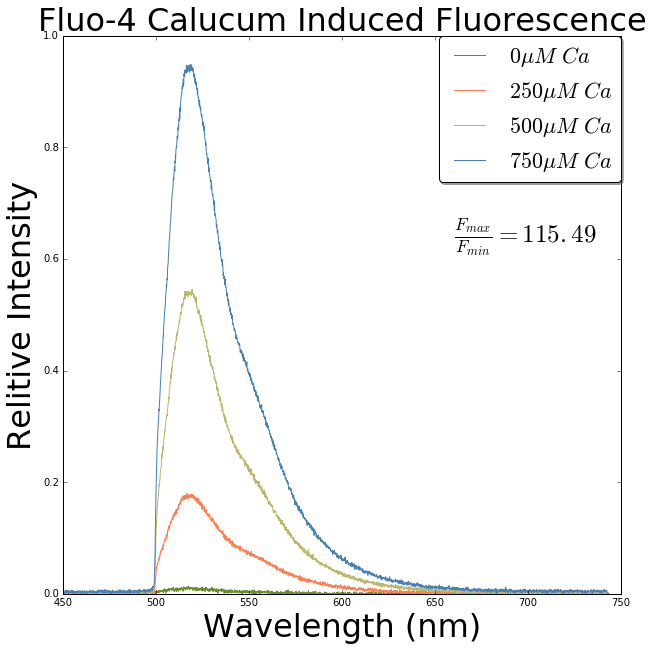

In [12]:
plt.figure(figsize=(10,10))

ca0f = ca0[ca0['dif']<.1]
ca1f = ca1[ca1['dif']<.1]
ca2f = ca2[ca2['dif']<.1]
ca3f = ca3[ca3['dif']<.1]



plt.plot(ca0f['wave'],ca0f['BS'],color='olivedrab',label=r'$0 \mu M$ $Ca$')
plt.plot(ca1f['wave'],ca1f['BS'],color='coral',label=r'$250 \mu M$ $Ca$')
plt.plot(ca2f['wave'],ca2f['BS'],color='darkkhaki',label=r'$500 \mu M$ $Ca$')
plt.plot(ca3f['wave'],ca3f['BS'],color='steelblue',label=r'$750 \mu M$ $Ca$')

plt.text(660, .63, r'$\frac{F_{max}}{F_{min}} = 115.49$', fontsize=25)

plt.xlabel('Wavelength (nm)', fontsize=32)
plt.ylabel('Relitive Intensity', fontsize=32)
plt.title('Fluo-4 Calucum Induced Fluorescence', fontsize=32)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)

plt.xlim(450,750)
plt.ylim(0,1)
#plt.savefig('Ar_Fluo4_ca.pdf')
plt.show()

In [7]:
ca0cut = ca0f[(ca0f['wave']>490) & (ca0f['wave']<700)]
ca3cut = ca3f[(ca3f['wave']>490) & (ca3f['wave']<700)]



In [25]:
ca0cut

,wave,sig,dif,BS
1506,490.050384,0.002152,0.001045,-0.001050
1507,490.165375,-0.003835,0.005987,-0.000054
1508,490.280395,-0.000176,0.003659,0.001395
1509,490.395416,-0.001958,0.001782,-0.002382
1510,490.510407,0.008661,0.010619,-0.000431
1511,490.625427,0.003340,0.005322,-0.001691
1512,490.740448,0.000441,0.002898,-0.002286
1513,490.855499,0.004599,0.004158,0.001848
1514,490.970520,0.009683,0.005084,0.000210
1515,491.085541,0.006143,0.003540,0.000827


In [9]:
f0 = ca0f['BS'].max()
f = ca3f['BS'].max()
S = (f-f0)/f0
S

67.746660245842733

In [10]:
f0

0.013797944648

In [11]:
f

0.94856261280700005

In [12]:
f/f0

68.746660245842733

In [13]:
(5.95e-3*20e-6)/(520e-6)

0.0002288461538461539

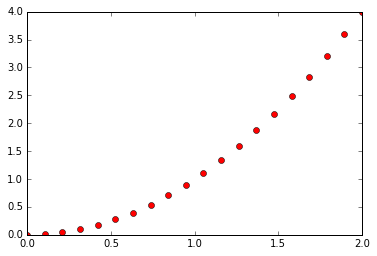

In [23]:
from scipy import integrate
x = np.linspace(0, 2, num=20)
y = x**2
y_int = integrate.trapz(y, x)
plt.plot(x, y, 'ro')
plt.show()

In [28]:
area00 = integrate.trapz(ca0cut['BS'], ca0cut['wave'])
area11 = integrate.trapz(ca3cut['BS'], ca3cut['wave'])

In [29]:
S = (area11-area00)/area00
S

114.49474858614826

In [30]:
print('area0 = ',area00)
print('area3 = ',area11)

area0 =  0.385294268257
area3 =  44.499464644


In [31]:
area11/area00

115.49474858614825